# Importing the required libraries

In [296]:
# importing the required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

# Importing algorithms

In [297]:
# importing algorithms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

## Reading the data from csv file

In [298]:
data = pd.read_csv("/content/deepslice_data.csv")
data.head()

,Unnamed: 0,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,1,Smartphone,1,LTE/5G,sunday,1,Non-GBR,0.01,100,eMBB
1,2,Smartphone,1,LTE/5G,sunday,2,Non-GBR,0.01,100,eMBB
2,3,Smartphone,1,LTE/5G,sunday,3,Non-GBR,0.01,100,eMBB
3,4,Smartphone,1,LTE/5G,sunday,4,Non-GBR,0.01,100,eMBB
4,5,Smartphone,1,LTE/5G,sunday,5,Non-GBR,0.01,100,eMBB


In [299]:
print('Number of Rows: {}'.format(data.shape[0]))
print('Number of Columns: {}'.format(data.shape[1]))

Number of Rows: 63167
Number of Columns: 10


In [300]:
data = data.drop(['Unnamed: 0'], axis=1)


In [301]:
print('Number of Rows: {}'.format(data.shape[0]))
print('Number of Columns: {}'.format(data.shape[1]))

Number of Rows: 63167
Number of Columns: 9


## Target Unique Value

Number of Unique Slice Type:  3


Text(0, 0.5, 'Frequency')

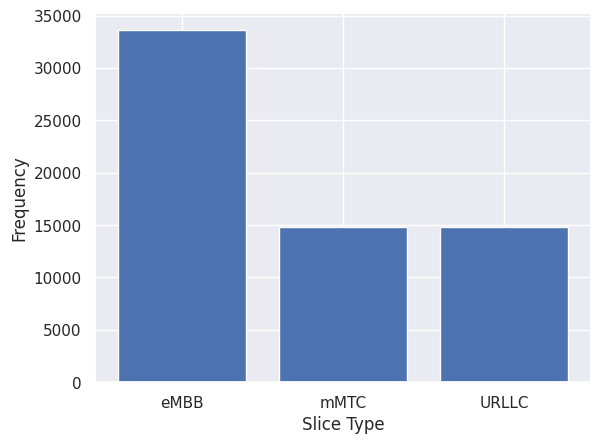

In [302]:
# Graph of Slice Type vs Frequency
freq_protocol = data['slice Type'].value_counts()
application_name = []
frequency_count = []
for key, value in freq_protocol.items():
    application_name.append(key)
    frequency_count.append(value)

print("Number of Unique Slice Type: ", len(freq_protocol))
top_values = 10
plt.bar(application_name[:top_values], frequency_count[:top_values])
plt.xlabel("Slice Type")
plt.ylabel("Frequency")

# Null value check

In [303]:
# remove the rows that contains NULL values
data.dropna(inplace=True)
data.dropna(axis='columns')
data.reset_index(drop=True, inplace=True)

# remove columns which contains zeroes in the data
data = data.loc[:, (data != 0).any(axis=0)]

In [304]:
print('Shape after removing rows with NULL Values')
print('Number of Rows: {}'.format(data.shape[0]))
print('Number of Columns: {}'.format(data.shape[1]))

Shape after removing rows with NULL Values
Number of Rows: 63167
Number of Columns: 9


# Converting Target Column to int

In [305]:
# converting the protocol name (target column) to required format (int)
# using LabelEncoder function from sklearn.preprocession library
encoder = LabelEncoder().fit(data['slice Type'])
data['slice Type'] = encoder.transform(data['slice Type'])
values = encoder.inverse_transform(data['slice Type'])
target_column = data['slice Type']

# mapping the encoded value
encoded_target_column = {}
for i in range(len(data['slice Type'])):
    encoded_target_column[data['slice Type'][i]] = values[i]

print(encoded_target_column)

{1: 'eMBB', 2: 'mMTC', 0: 'URLLC'}


# Label Encoding to each categorical column

In [306]:
# Identify categorical columns
from sklearn.preprocessing import LabelEncoder
categorical_columns = data.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [307]:
data.head()

,Use Case,LTE/5g Category,Technology Supported,Day,Time,GBR,Packet Loss Rate,Packet delay,slice Type
0,7,1,1,3,1,1,0.01,100,1
1,7,1,1,3,2,1,0.01,100,1
2,7,1,1,3,3,1,0.01,100,1
3,7,1,1,3,4,1,0.01,100,1
4,7,1,1,3,5,1,0.01,100,1


In [308]:
# get all the column heads
data.columns

Index(['Use Case', 'LTE/5g Category', 'Technology Supported', 'Day', 'Time',
       'GBR', 'Packet Loss Rate', 'Packet delay', 'slice Type'],
      dtype='object')

In [309]:
# Copy Dataset
dataset = data

#Check Data Have Null Value

In [310]:
print(f"Number of NaNs is {(dataset.isna().sum() > 0).sum()}")

Number of NaNs is 0


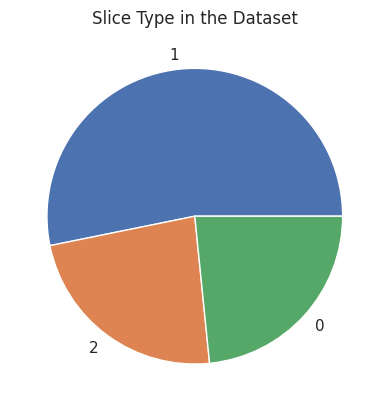

In [311]:
protocol_name = dataset['slice Type'].value_counts(ascending=False)
names, count = protocol_name.index.values, protocol_name.values
plt.pie(count, labels=names);
plt.title("Slice Type in the Dataset");

In [312]:
dataset['slice Type'].value_counts()

slice Type
1    33599
2    14784
0    14784
Name: count, dtype: int64

In [313]:
## Dimensionlaity of the Model
print("Number of Rows:", dataset.shape[0])
print("Number of Columns:", dataset.shape[1])

Number of Rows: 63167
Number of Columns: 9


<Axes: xlabel='slice Type', ylabel='count'>

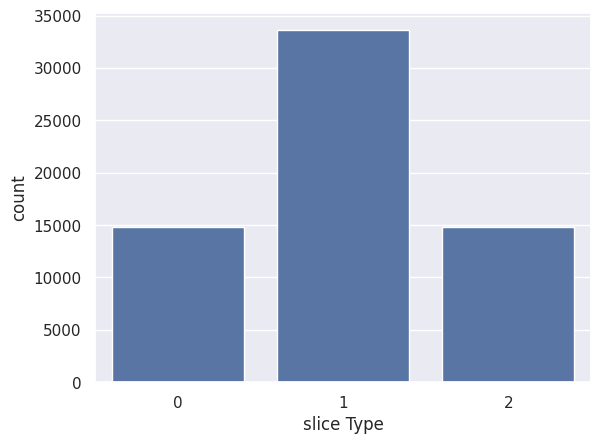

In [314]:
sns.set(style = "darkgrid")
sns.countplot(x = "slice Type",data=dataset)

In [315]:
dataset['slice Type'].value_counts()

slice Type
1    33599
2    14784
0    14784
Name: count, dtype: int64

# Applying Pearson Correaltion

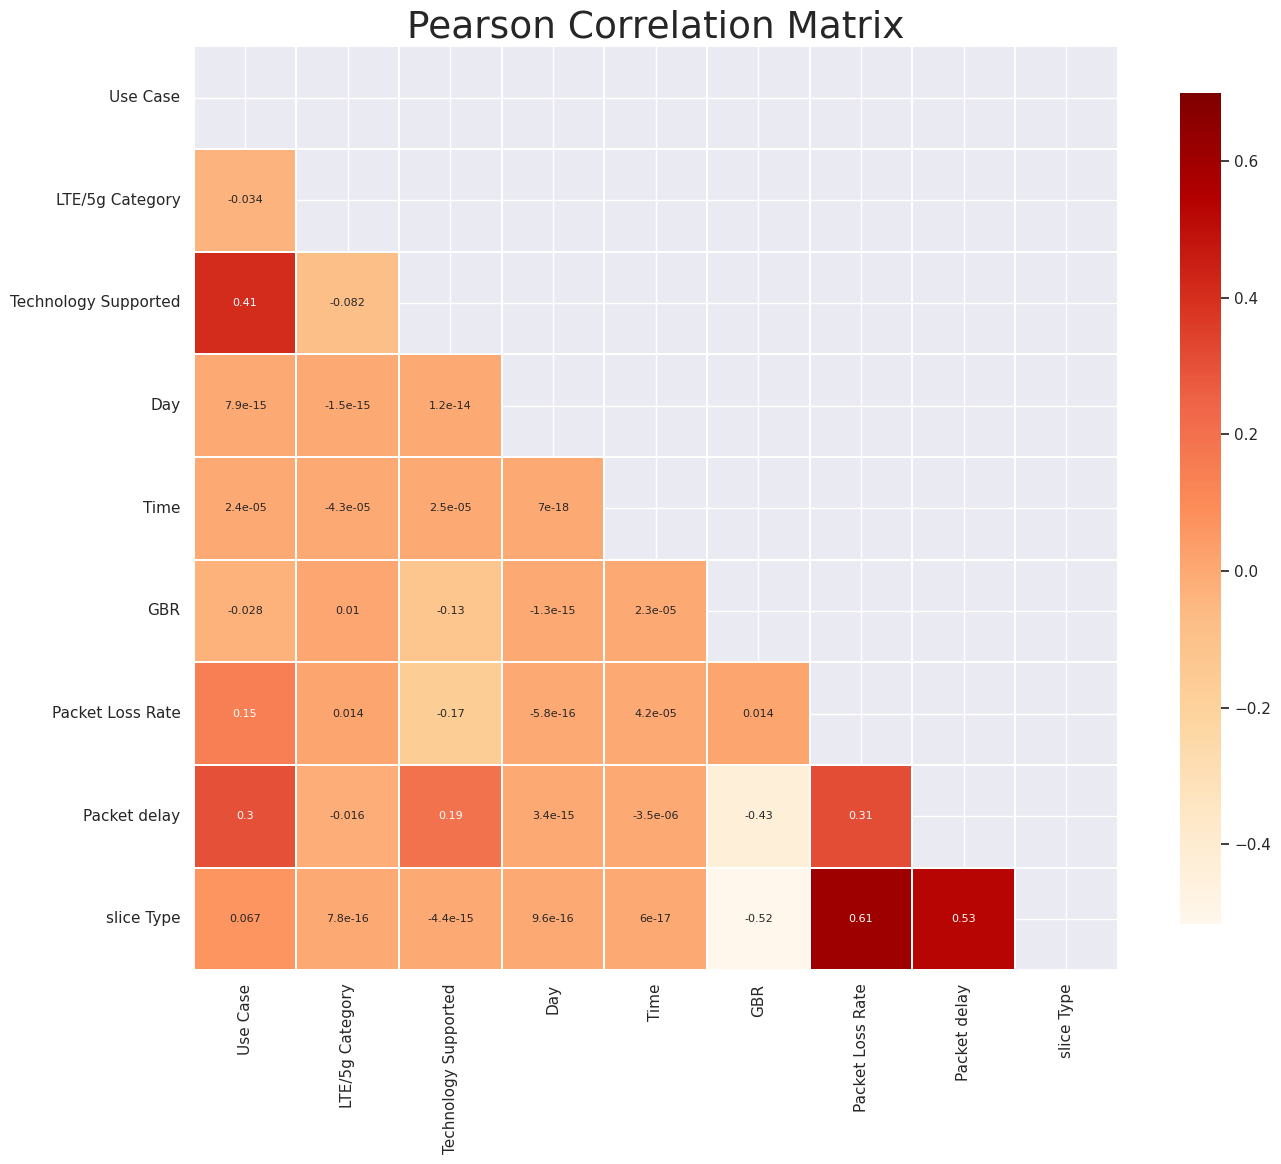

In [316]:
features = dataset.columns ## Fetching all Features Column names
## Applying Pearson Correaltion
mask = np.zeros_like(dataset[features].corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
## Creating a Plot Diagram
f, ax = plt.subplots(figsize=(16, 12))
## Title of Plot
plt.title('Pearson Correlation Matrix',fontsize=27)
sns.heatmap(dataset[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="OrRd",
linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});
plt.savefig('Correlation_Features.pdf')

In [317]:
relevant_features = mask[mask>0.8] ## selecting features with 80% correlation
corr_matrix = dataset.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

In [318]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
dataset = dataset.drop(dataset[to_drop], axis=1)
to_drop

[]

In [319]:
x_dataset = dataset.drop(['slice Type'], axis = 1)
y_dataset = dataset['slice Type']


# RandomForestClassifier For Feature Reduction

In [320]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_dataset, y_dataset)

RandomForestClassifier(random_state=0)

In [321]:
feature_scores = pd.Series(clf.feature_importances_, index=x_dataset.columns).sort_values(ascending=False)
feature_scores

Technology Supported    0.411700
Packet delay            0.238061
Packet Loss Rate        0.153440
Use Case                0.149543
GBR                     0.042772
LTE/5g Category         0.004455
Time                    0.000020
Day                     0.000010
dtype: float64

<ipython-input-322-a18e112a73fd>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


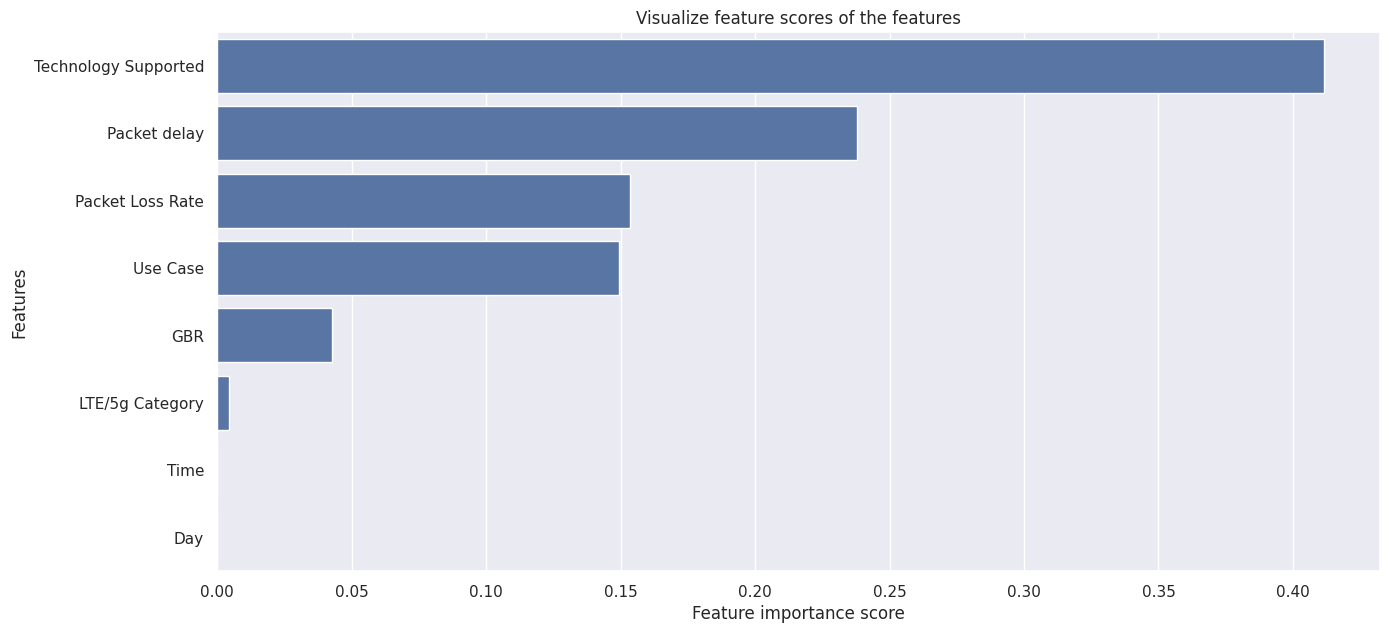

In [322]:
f, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.savefig('revised_dataset.pdf')
plt.show()

In [323]:
feature_scores.shape

(8,)

In [324]:
feature_scores

Technology Supported    0.411700
Packet delay            0.238061
Packet Loss Rate        0.153440
Use Case                0.149543
GBR                     0.042772
LTE/5g Category         0.004455
Time                    0.000020
Day                     0.000010
dtype: float64

In [325]:
features = feature_scores.index[0:7]

In [326]:
features

Index(['Technology Supported', 'Packet delay', 'Packet Loss Rate', 'Use Case',
       'GBR', 'LTE/5g Category', 'Time'],
      dtype='object')

In [327]:
x_dataset = x_dataset[features]

In [328]:
x_dataset

,Technology Supported,Packet delay,Packet Loss Rate,Use Case,GBR,LTE/5g Category,Time
0,1,100,0.010000,7,1,1,1
1,1,100,0.010000,7,1,1,2
2,1,100,0.010000,7,1,1,3
3,1,100,0.010000,7,1,1,4
4,1,100,0.010000,7,1,1,5
...,...,...,...,...,...,...,...
63162,0,10,0.000001,6,1,22,19
63163,0,10,0.000001,6,1,22,20
63164,0,10,0.000001,6,1,22,21
63165,0,10,0.000001,6,1,22,22


In [329]:
y_dataset

0        1
1        1
2        1
3        1
4        1
        ..
63162    0
63163    0
63164    0
63165    0
63166    0
Name: slice Type, Length: 63167, dtype: int64

# Train Test Split Dataset

In [330]:
x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.3, random_state=42)


In [331]:
x_train_scaled = x_train
x_test_scaled = x_test

In [332]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# RNN model Implementation

In [333]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Reshape, SimpleRNN, Dropout, Dense, Flatten
from tensorflow.keras.models import Model

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the RNN model
inputs = Input(shape=(x_train_scaled.shape[1],))
reshaped_inputs = Reshape((1, x_train_scaled.shape[1]))(inputs)
rnn_layer = SimpleRNN(8, activation='relu', return_sequences=True)(reshaped_inputs)
dropout_layer = Dropout(0.5)(rnn_layer)
flatten_layer = Flatten()(dropout_layer)
dense_layer = Dense(4, activation='relu')(flatten_layer)
outputs = Dense(3, activation='softmax')(dense_layer)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
#model.summary()

# Train the model with validation data
history = model.fit(x_train_scaled, y_train, epochs=8, batch_size=64, validation_split=0.5)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_scaled, y_test)

# Print test accuracy
print(f'Test accuracy: {accuracy:.8f}')


Epoch 1/8
346/346 [==============================] - 8s 15ms/step - loss: 2.3748 - accuracy: 0.4194 - val_loss: 1.0935 - val_accuracy: 0.2348
Epoch 2/8
346/346 [==============================] - 3s 9ms/step - loss: 0.9707 - accuracy: 0.5168 - val_loss: 1.0526 - val_accuracy: 0.5360
Epoch 3/8
346/346 [==============================] - 4s 10ms/step - loss: 0.8774 - accuracy: 0.5613 - val_loss: 0.9381 - val_accuracy: 0.6856
Epoch 4/8
346/346 [==============================] - 5s 14ms/step - loss: 0.7120 - accuracy: 0.6769 - val_loss: 0.6338 - val_accuracy: 0.7479
Epoch 5/8
346/346 [==============================] - 3s 10ms/step - loss: 0.6181 - accuracy: 0.7189 - val_loss: 0.5643 - val_accuracy: 0.7609
Epoch 6/8
346/346 [==============================] - 3s 9ms/step - loss: 0.5822 - accuracy: 0.7259 - val_loss: 0.5307 - val_accuracy: 0.7654
Epoch 7/8
346/346 [==============================] - 5s 13ms/step - loss: 0.5656 - accuracy: 0.7308 - val_loss: 0.5146 - val_accuracy: 0.7670
Epoch 8/

# Evaluate the model on the test set

In [334]:
# Evaluate the model on the test set
rnn_loss, rnn_accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test accuracy: {accuracy:.8f}')

593/593 [==============================] - 1s 2ms/step - loss: 0.5062 - accuracy: 0.7603
Test accuracy: 0.76027650


# Plot accuracy and loss graphs

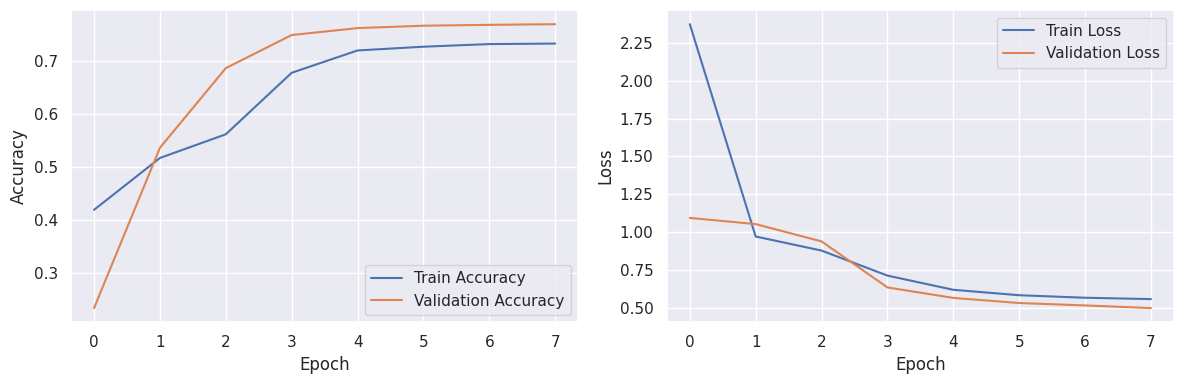

In [335]:
# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')

plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Predict on test data

In [336]:
# Predict on test data
y_pred = np.argmax(model.predict(x_test_scaled), axis=1)

593/593 [==============================] - 1s 2ms/step


In [337]:
classes = np.unique(y_resampled)

# Classification report

In [338]:
class_names = ['mMTC','URLLC','eMBB']
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

        mMTC       1.00      0.99      0.99      4408
       URLLC       0.69      1.00      0.82     10053
        eMBB       0.00      0.00      0.00      4490

    accuracy                           0.76     18951
   macro avg       0.56      0.66      0.60     18951
weighted avg       0.60      0.76      0.66     18951



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion matrix

In [339]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

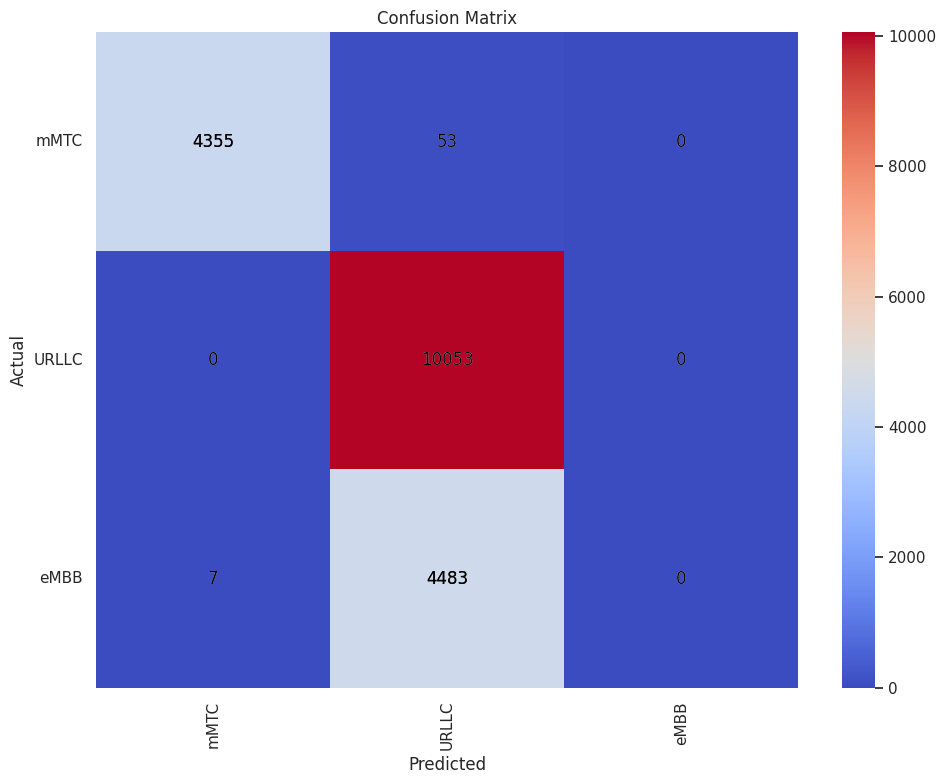

In [340]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='coolwarm',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show complete values in boxes
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, str(conf_matrix[i, j]),
                 ha='center', va='center', color='black')

plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=90)
plt.yticks(np.arange(len(class_names)) + 0.5, class_names, rotation=0)
plt.tight_layout()
plt.show()

## End of RNN

## LSTM Model

In [341]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Reshape, LSTM, Dropout, Dense, Flatten
from tensorflow.keras.models import Model

# Set random seed for reproducibility
np.random.seed(43)
tf.random.set_seed(43)

# Define the LSTM model
inputs = Input(shape=(x_train_scaled.shape[1],))
reshaped_inputs = Reshape((1, x_train_scaled.shape[1]))(inputs)
lstm_layer = LSTM(256, activation='relu', return_sequences=True)(reshaped_inputs)
dropout_layer = Dropout(0.9)(lstm_layer)
flatten_layer = Flatten()(dropout_layer)
dense_layer = Dense(64, activation='relu')(flatten_layer)
outputs = Dense(3, activation='softmax')(dense_layer)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation data
history = model.fit(x_train_scaled, y_train, epochs=3, batch_size=64, validation_split=0.5)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_scaled, y_test)

# Print test accuracy
print(f'Test accuracy: {accuracy:.8f}')

Epoch 1/3
346/346 [==============================] - 10s 23ms/step - loss: 0.6272 - accuracy: 0.7594 - val_loss: 0.2744 - val_accuracy: 0.8586
Epoch 2/3
346/346 [==============================] - 4s 13ms/step - loss: 0.2781 - accuracy: 0.8536 - val_loss: 0.2151 - val_accuracy: 0.8909
Epoch 3/3
593/593 [==============================] - 3s 4ms/step - loss: 0.1625 - accuracy: 0.9793
Test accuracy: 0.97931510


# Evaluate the model on the test set

In [342]:
# Evaluate the model on the test set
lstm_loss, lstm_accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test accuracy: {lstm_accuracy:.4f}')

593/593 [==============================] - 2s 3ms/step - loss: 0.1625 - accuracy: 0.9793
Test accuracy: 0.9793


# Plot accuracy and loss graphs

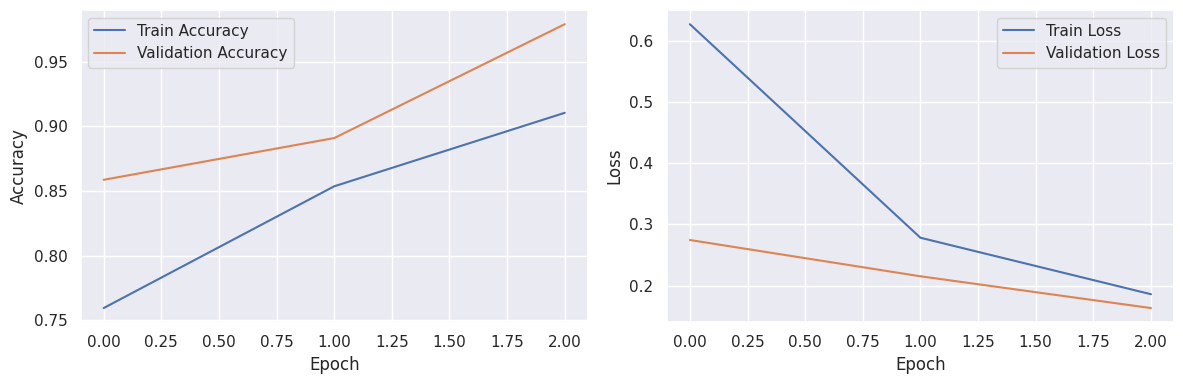

In [343]:
# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')

plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [344]:
class_names = ['mMTC','URLLC','eMBB']
# Predict on test data
y_pred = np.argmax(model.predict(x_test_scaled), axis=1)
classification_rep = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", classification_rep)

593/593 [==============================] - 2s 3ms/step
Classification Report:
               precision    recall  f1-score   support

        mMTC       1.00      1.00      1.00      4408
       URLLC       0.96      1.00      0.98     10053
        eMBB       0.99      0.92      0.95      4490

    accuracy                           0.98     18951
   macro avg       0.99      0.97      0.98     18951
weighted avg       0.98      0.98      0.98     18951



# Confusion Matrix

In [345]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

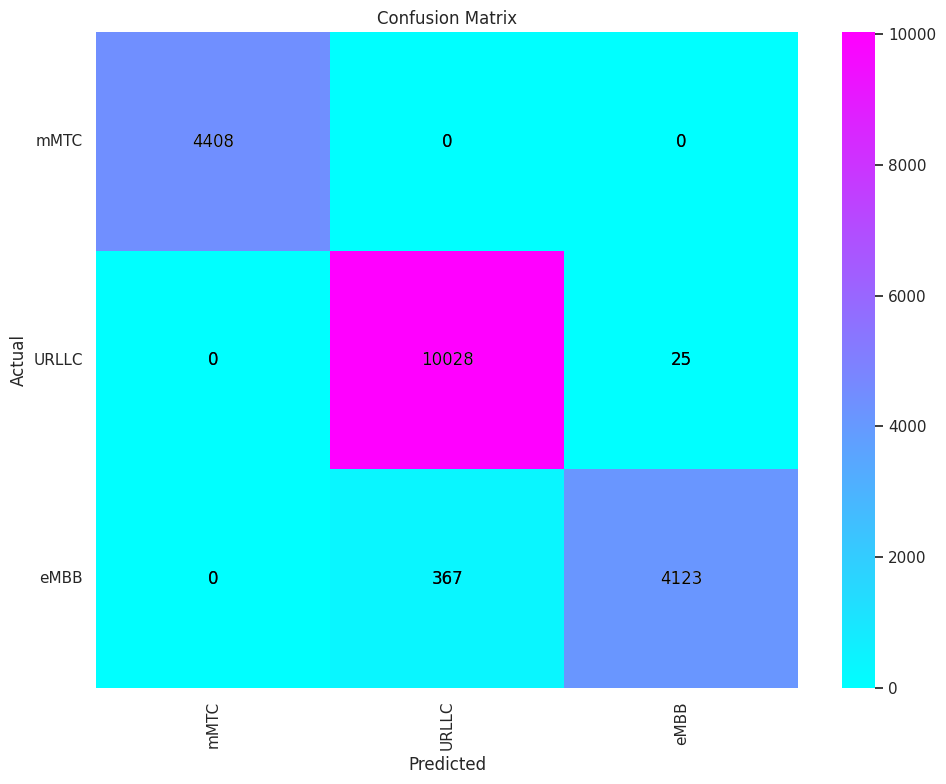

In [346]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='cool',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show complete values in boxes
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j + 0.5, i + 0.5, str(conf_matrix[i, j]),
                 ha='center', va='center', color='black')

plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=90)
plt.yticks(np.arange(len(class_names)) + 0.5, class_names, rotation=0)
plt.tight_layout()
plt.show()

#Implementation of Machine Learning Models

#Random Forest Classifier

In [347]:
# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(max_depth=2, n_estimators=1, random_state=12)
rf_classifier.fit(x_train_scaled, y_train)

RandomForestClassifier(max_depth=2, n_estimators=1, random_state=12)

#Evaluation for Random Forest

In [348]:
# Predictions and evaluation for Random Forest
rf_predictions = rf_classifier.predict(x_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.824969658593214


#Classification Report

In [349]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40      4408
           1       1.00      1.00      1.00     10053
           2       0.58      1.00      0.73      4490

    accuracy                           0.82     18951
   macro avg       0.86      0.75      0.71     18951
weighted avg       0.90      0.82      0.80     18951



#Confusion matrix

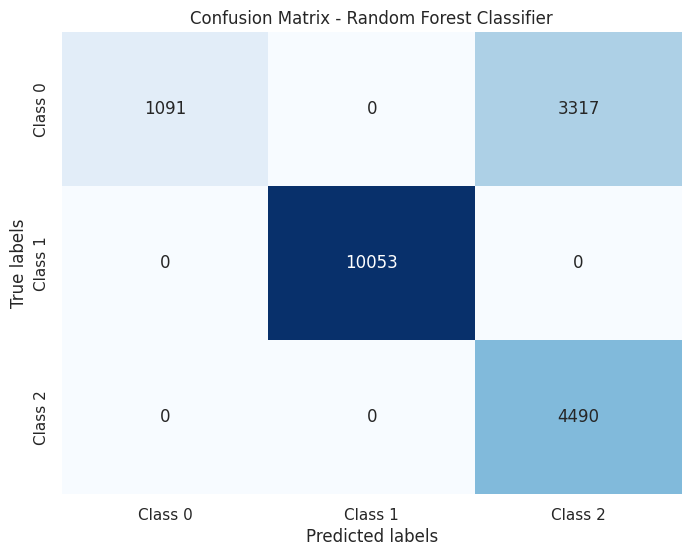

In [350]:
# Plot heatmap confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

## Logistic Regression Classifier

In [351]:
# Initialize and train Logistic Regression Classifier
lr_classifier = LogisticRegression(C=0.0001, random_state=13)
lr_classifier.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.0001, random_state=13)

#Evaluation for Logistic Regression

In [352]:
# Predictions and evaluation for Logistic Regression
lr_predictions = lr_classifier.predict(x_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("LR Accuracy:", lr_accuracy)

LR Accuracy: 0.9102422035776476


# Classification Report

In [353]:
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4408
           1       0.86      1.00      0.92     10053
           2       1.00      0.64      0.78      4490

    accuracy                           0.91     18951
   macro avg       0.95      0.87      0.90     18951
weighted avg       0.92      0.91      0.90     18951



#Confusion Matrix Logistic Regression Classifier

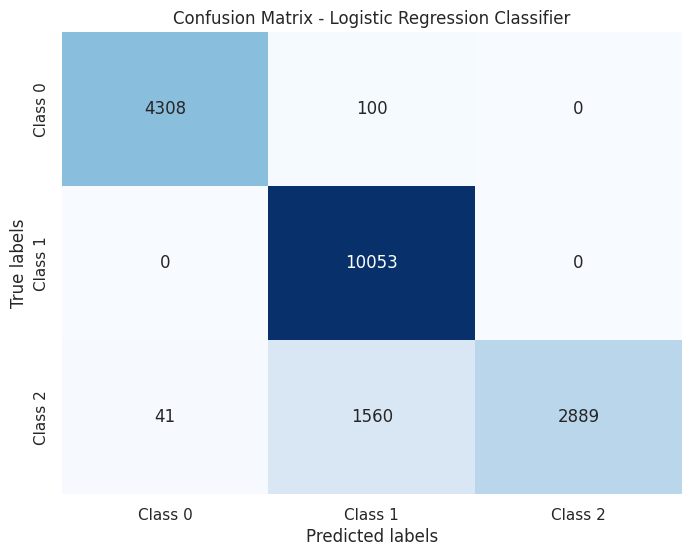

In [354]:
# Plot heatmap confusion matrix
conf_matrix = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression Classifier')
plt.show()

#Comparison of Model Accuracies

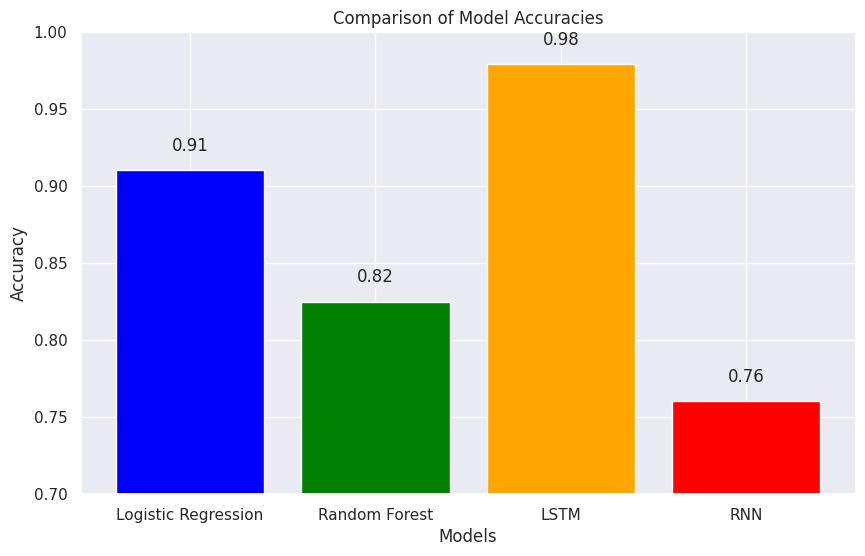

In [358]:
import matplotlib.pyplot as plt

# Define the accuracies
accuracies = [lr_accuracy, rf_accuracy, lstm_accuracy, rnn_accuracy]
models = ['Logistic Regression', 'Random Forest', 'LSTM', 'RNN']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])

# Add text labels above each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{acc:.2f}', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.70, 1.0)  # Set y-axis limits from 0.60 to 1.0
plt.show()
